# PROJECT 

## Predict whether annual income of an individual exceeds $50K/yr based on census data

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

In [119]:
data=pd.read_csv('predict_annual_income.csv')
df=data

In [121]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,income_encoded
0,56,Local-gov,HS-grad,10,Married-civ-spouse,Exec-managerial,Other-relative,Asian-Pac-Islander,Male,82,Puerto-Rico,<=50K,0
1,69,Self-emp-inc,7th-8th,12,Never-married,Prof-specialty,Not-in-family,White,Female,40,South,<=50K,0
2,46,Local-gov,11th,1,Never-married,Exec-managerial,Husband,Amer-Indian-Eskimo,Male,66,Canada,<=50K,0
3,32,State-gov,HS-grad,13,Divorced,Exec-managerial,Other-relative,White,Male,22,England,<=50K,0
4,60,Self-emp-inc,11th,12,Divorced,Exec-managerial,Wife,Black,Female,80,India,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,Local-gov,Preschool,9,Married-spouse-absent,Sales,Wife,White,Female,87,India,<=50K,0
9996,23,Without-pay,Bachelors,6,Separated,Sales,Other-relative,Black,Female,56,Italy,<=50K,0
9997,18,Self-emp-not-inc,Masters,15,Never-married,Exec-managerial,Wife,White,Male,76,Cambodia,<=50K,0
9998,21,State-gov,12th,7,Separated,Machine-op-inspct,Other-relative,Other,Female,62,Greece,<=50K,0


### DATA PREPROCESSING

In [124]:
pd.unique(data['income'])

array(['<=50K', '>50K'], dtype=object)

In [126]:
data['workclass']=data['workclass'].replace('?','Business')

In [128]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
native-country    object
income            object
income_encoded     int64
dtype: object

In [139]:
le=LabelEncoder()
data['workclass']=le.fit_transform(data['workclass'])
le1=LabelEncoder()
data['education']=le1.fit_transform(data['education'])
le2=LabelEncoder()
data['marital-status']=le2.fit_transform(data['marital-status'])
le3=LabelEncoder()
data['occupation']=le3.fit_transform(data['occupation'])
le4=LabelEncoder()
data['race']=le4.fit_transform(data['race'])
le5=LabelEncoder()
data['sex']=le5.fit_transform(data['sex'])
le6=LabelEncoder()
data['native-country']=le6.fit_transform(data['native-country'])
le7=LabelEncoder()
data['income']=le7.fit_transform(data['income'])


In [141]:
x=data.drop(columns=['income','income_encoded','relationship'])

In [143]:
le = LabelEncoder()
data['workclass'] = le.fit_transform(data['workclass'])

le1 = LabelEncoder()
data['education'] = le1.fit_transform(data['education'])

le2 = LabelEncoder()
data['marital-status'] = le2.fit_transform(data['marital-status'])

le3 = LabelEncoder()
data['occupation'] = le3.fit_transform(data['occupation'])

le4 = LabelEncoder()
data['race'] = le4.fit_transform(data['race'])

le5 = LabelEncoder()
data['sex'] = le5.fit_transform(data['sex'])

le6 = LabelEncoder()
data['native-country'] = le6.fit_transform(data['native-country'])

le7 = LabelEncoder()  # Correct encoder for income
data['income'] = le7.fit_transform(data['income'])

In [146]:
x

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country
0,56,2,11,10,2,3,1,1,82,15
1,69,5,5,12,4,9,4,0,40,16
2,46,2,1,1,4,3,0,1,66,1
3,32,7,11,13,0,3,4,1,22,4
4,60,5,1,12,0,3,2,0,80,7
...,...,...,...,...,...,...,...,...,...,...
9995,38,2,13,9,3,11,4,0,87,7
9996,23,8,9,6,5,11,2,0,56,9
9997,18,6,12,15,4,3,4,1,76,0
9998,21,7,2,7,5,6,3,0,62,6


In [148]:
y=data['income']

In [150]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [152]:

x=X_resampled
y=y_resampled

### DATA EXPLORATION

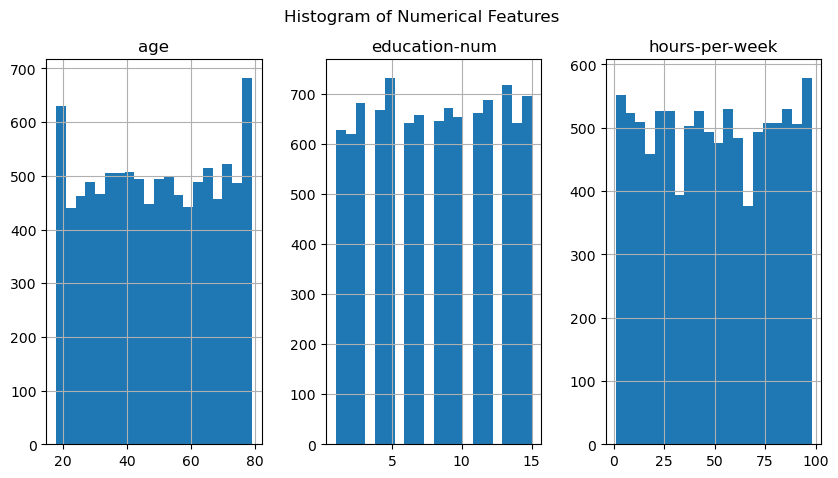

In [155]:
numerical_features = ['age', 'education-num', 'hours-per-week']
df[numerical_features].hist(bins=20, figsize=(10, 5), layout=(1, 3))
plt.suptitle("Histogram of Numerical Features")
plt.show()

### MODEL SELECTION

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

## MODEL SELECTION

In [162]:
from sklearn.linear_model import LogisticRegression

In [164]:
logi_model=LogisticRegression()

In [166]:
logi_model.fit(x_train,y_train)


LogisticRegression()

In [168]:
logi_model.score(x_test,y_test)

0.9393150410574804

#### Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(max_depth=20)
decision_tree.fit(x_train,y_train)
decision_tree.score(x_test,y_test)

0.9975966352894051

#### Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
random_forest.score(x_test,y_test)

0.9987983176447026

#### KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9749649509313039

#### SVM

In [180]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [182]:
scaler = StandardScaler()
x_train_sceld = scaler.fit_transform(x_train)
x_test_sceld = scaler.fit_transform(x_test)

In [184]:
svr=SVC(kernel='linear')
svr.fit(x_train_sceld,y_train)
svr.score(x_test_sceld,y_test)


0.9407170038053274

In [36]:
svrp=SVC(kernel='poly',degree=3,C=5,gamma='scale')
svrp.fit(x_train_sceld,y_train)
svrp.score(x_test_sceld,y_test)

In [37]:
svrsg=SVC(kernel='sigmoid')
svrsg.fit(x_train_sceld,y_train)
svrsg.score(x_test_sceld,y_test)

In [38]:
svrgs=SVC(kernel='rbf')
svrgs.fit(x_train_sceld,y_train)
svrgs.score(x_test_sceld,y_test)

#### Naive bayes

In [185]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
nvbG=GaussianNB()
nvbG.fit(x_train,y_train)


GaussianNB()

In [186]:
nvbG.score(x_test,y_test)

0.9817744842779892

#### Adaboost

In [191]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=50,estimator=None,learning_rate=0.3,random_state=1)

In [193]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, random_state=1)

In [194]:
adaboost.score(x_test,y_test)

0.9963949529341077

#### xg boost

In [198]:
from xgboost import XGBClassifier

In [200]:
xg_model=XGBClassifier()

In [202]:
xg_model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [204]:
xg_model.score(x_test,y_test)

0.9983977568596034

In [206]:
from sklearn.ensemble import GradientBoostingClassifier


### CROSS VALIDATION

In [53]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pandas as pd
import numpy as np



# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Evaluate each model
results = {}

for name, model in models.items():
    print(f"Evaluating: {name}")
    scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
    results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Standard Deviation": np.std(scores)
    }
    print(f"Mean Accuracy: {results[name]['Mean Accuracy']:.4f}, Std Dev: {results[name]['Standard Deviation']:.4f}")

# Display results
results_df = pd.DataFrame(results).T
print("\nSummary of Cross-Validation Results:")
print(results_df)


## HYPER PARAMETER TUNING

In [208]:
from sklearn.model_selection import GridSearchCV

In [210]:
import xgboost as xgb
from xgboost import XGBClassifier 

In [212]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Accuracy: 0.9982639512672433


In [213]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [214]:
y_pred=grid_search.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

## MODEL ANALYSYS

In [216]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9987983176447026

In [217]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2517
           1       1.00      1.00      1.00      2476

    accuracy                           1.00      4993
   macro avg       1.00      1.00      1.00      4993
weighted avg       1.00      1.00      1.00      4993



In [218]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2511,    6],
       [   0, 2476]], dtype=int64)

## DEPLOYMENT

In [226]:
import joblib

In [228]:
joblib.dump(xg_model,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\project.pkl")
joblib.dump(le,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\le.pkl")
joblib.dump(le1,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\le1.pkl")
joblib.dump(le2,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\le2.pkl")
joblib.dump(le3,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\le3.pkl")
joblib.dump(le4,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\le4.pkl")
joblib.dump(le5,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\le5.pkl")
joblib.dump(le6,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\le6.pkl")


['C:\\Users\\USER\\Desktop\\DATA SCIENCE\\TECHOLAS\\MACHINE LEARNING\\PROJECT\\le6.pkl']

In [230]:
#joblib.dump(scaler,r"C:\Users\USER\Desktop\DATA SCIENCE\TECHOLAS\MACHINE LEARNING\PROJECT\scaler.pkl")